# Load the Data

In [17]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/cars.csv')  # Adjust path if needed

# Show first 5 rows
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


# Data Visualization

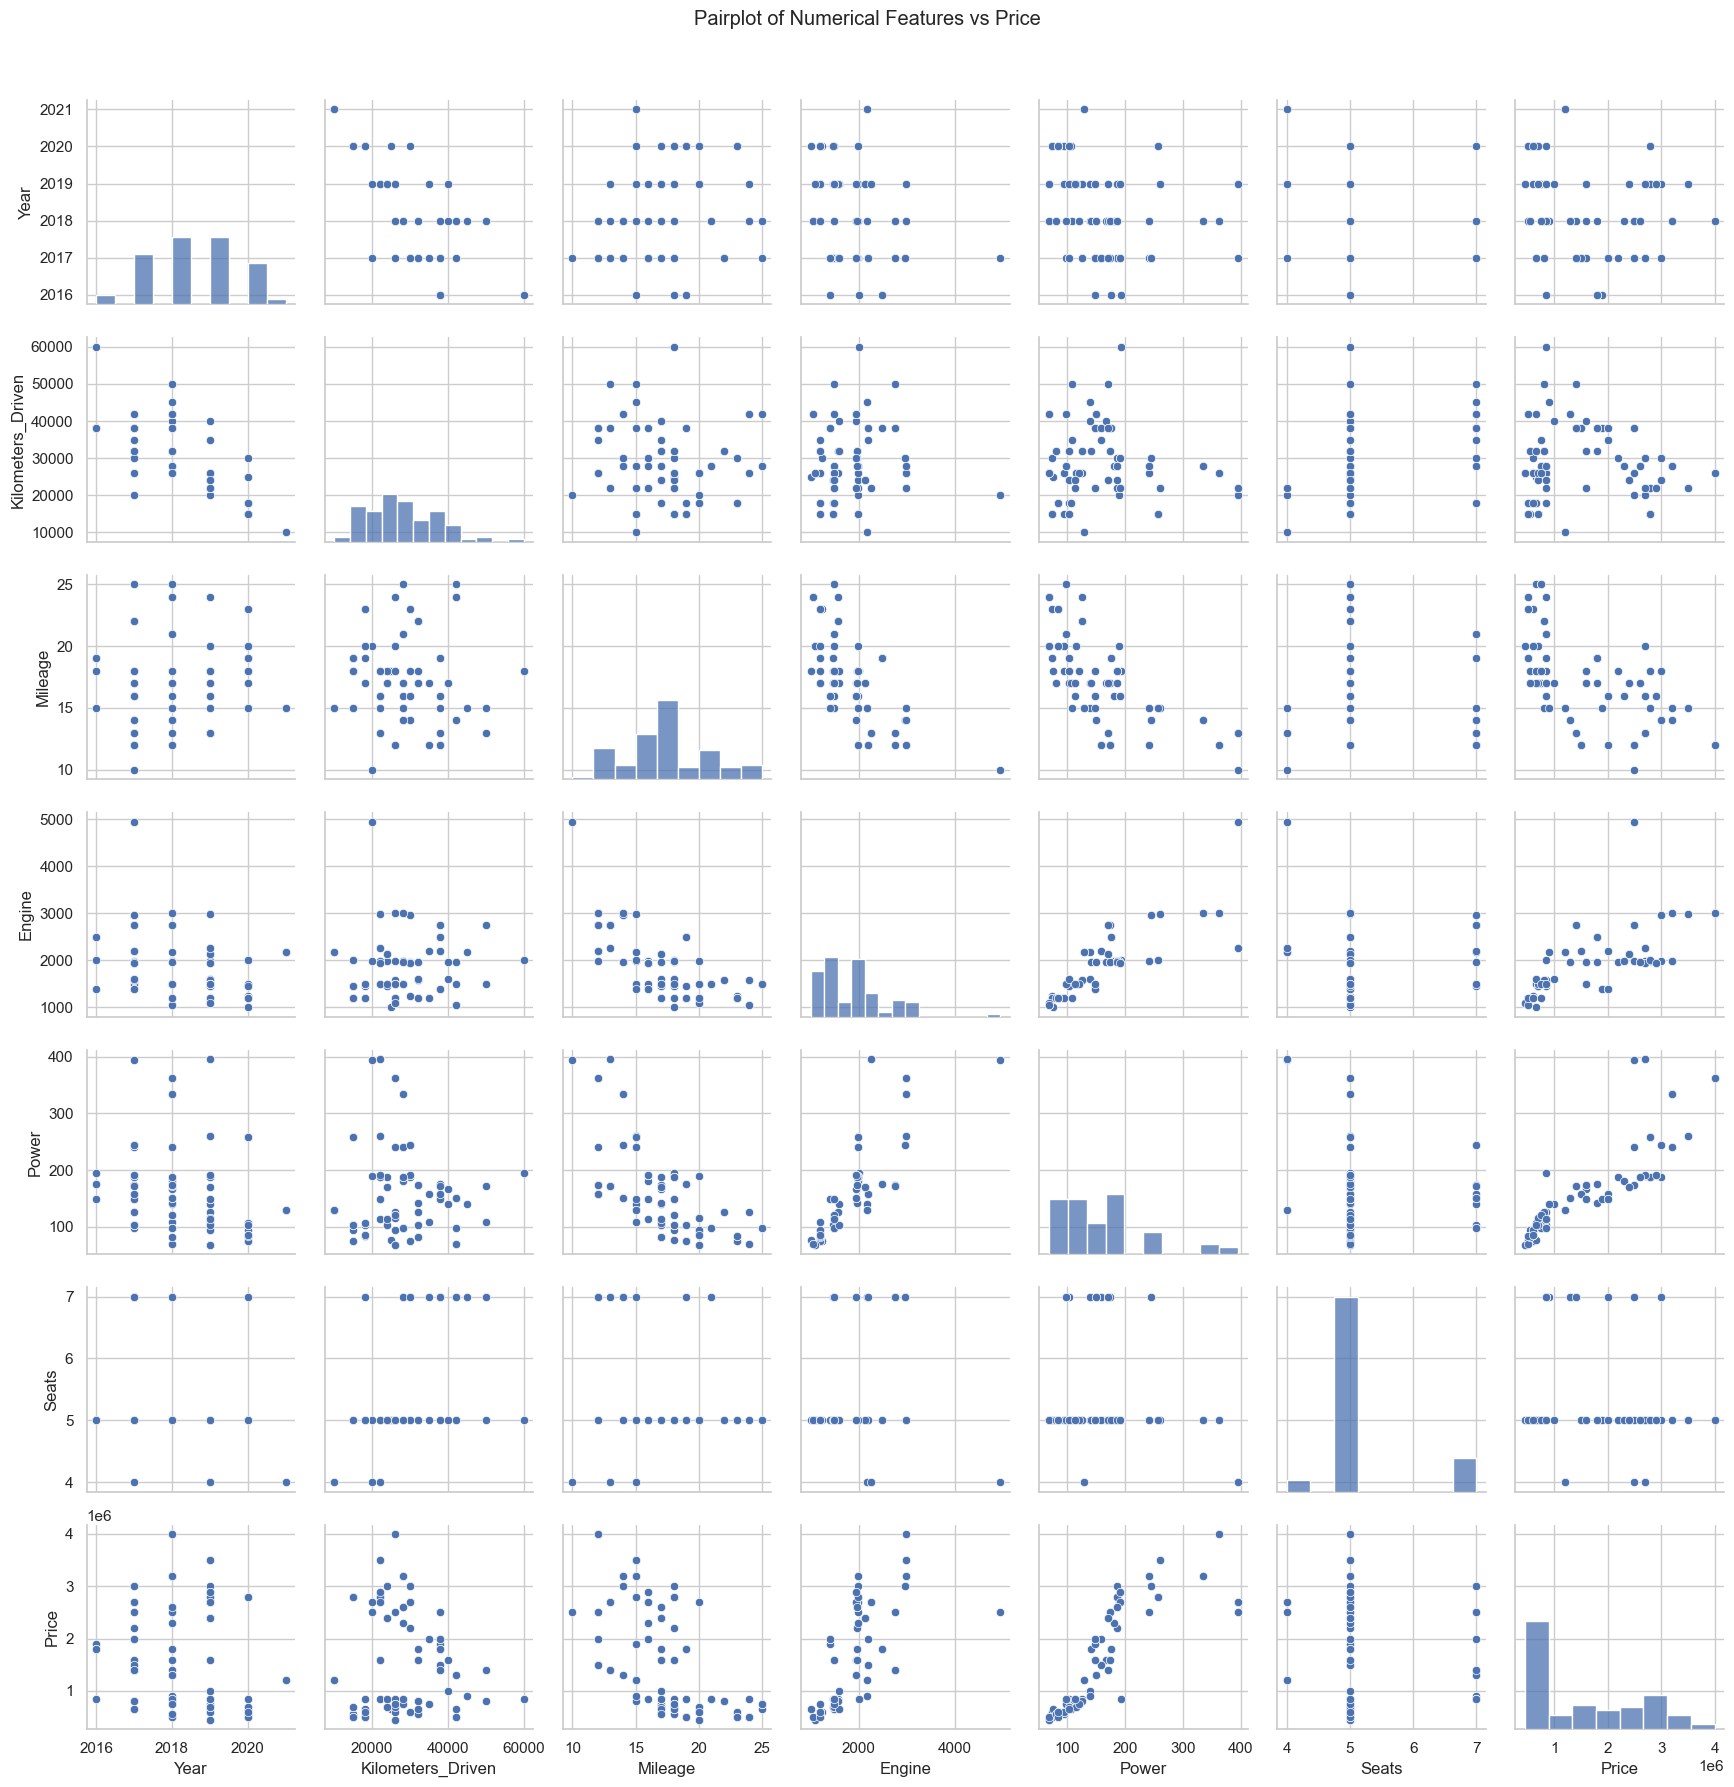

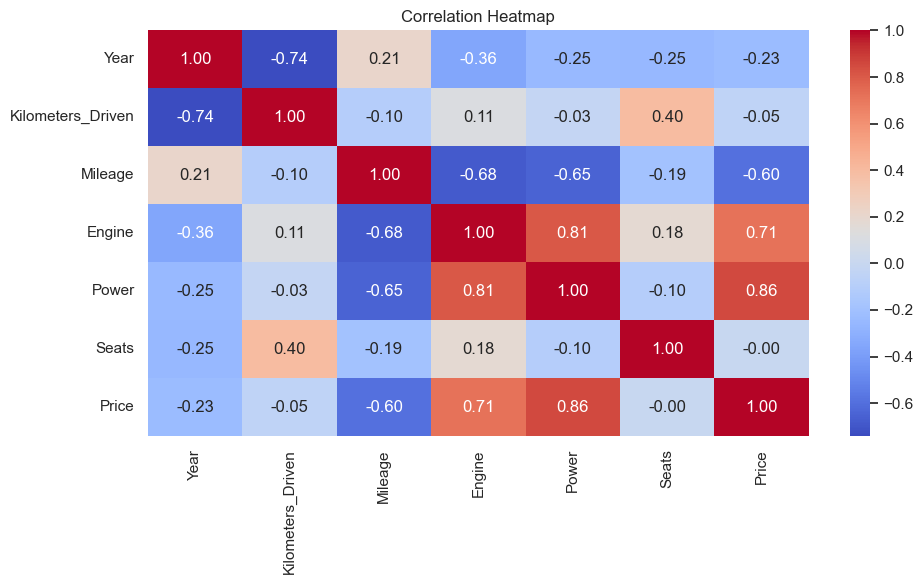

In [18]:
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Pairplot to explore relationships between numerical features and Price
sns.pairplot(df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']])
plt.suptitle("Pairplot of Numerical Features vs Price", y=1.02)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Data Cleaning & Preprocessing

In [19]:
# Drop Car_ID (since these are not useful for prediction)
df.drop('Car_ID', axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check final dataset shape
print("Shape after encoding:", df_encoded.shape)

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
Shape after encoding: (100, 78)


# Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9102163333819301
RMSE: 73429571743.58847


# Save the Model

In [22]:
import pickle

# Save model to file
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Multiple modal training

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append({"Model": name, "R2 Score": round(r2, 4), "RMSE": round(rmse, 2)})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

               Model  R2 Score          RMSE
0  Linear Regression    0.9102  7.342957e+10
1      Decision Tree    0.8779  9.987500e+10
2      Random Forest    0.8240  1.439252e+11
3  Gradient Boosting    0.8193  1.477496e+11


Finally Linear Regression R2 Score is more than other model

# Visual Performance

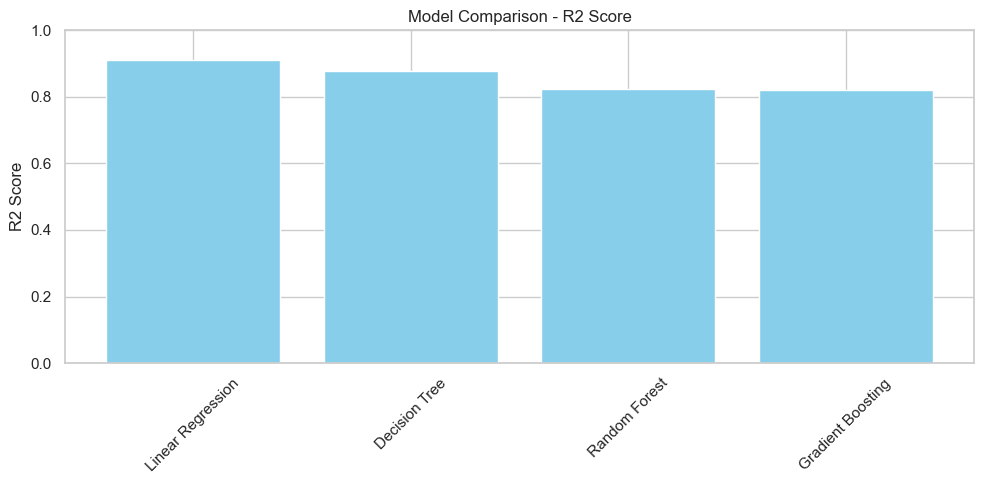

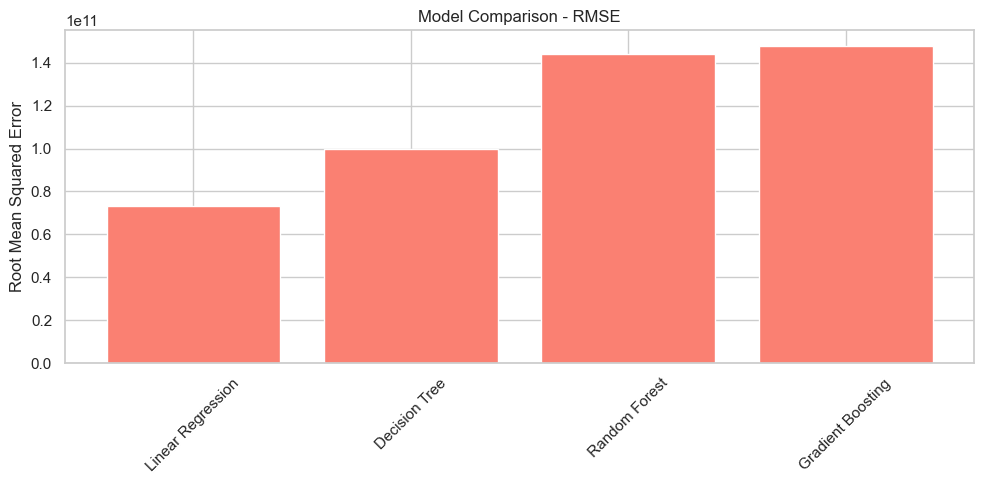

In [26]:
import matplotlib.pyplot as plt

# Plot R2 Score
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["R2 Score"], color='skyblue')
plt.title("Model Comparison - R2 Score")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["RMSE"], color='salmon')
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()